In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from matplotlib import font_manager
import json
import os
import numpy as np
import glob
from pprint import pprint
from modelzipper.tutils import *
from matplotlib.colors import ListedColormap, BoundaryNorm

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [2]:
for font in font_manager.fontManager.ttflist:
    print(font.name)

DejaVu Sans
STIXGeneral
DejaVu Sans Mono
STIXGeneral
cmss10
DejaVu Sans
DejaVu Sans Mono
DejaVu Serif
STIXSizeFiveSym
cmex10
cmsy10
DejaVu Serif
STIXSizeTwoSym
STIXGeneral
STIXSizeFourSym
cmr10
DejaVu Serif Display
STIXSizeThreeSym
DejaVu Serif
STIXGeneral
DejaVu Sans Mono
STIXNonUnicode
STIXSizeOneSym
cmb10
DejaVu Sans Display
STIXSizeTwoSym
DejaVu Serif
DejaVu Sans Mono
STIXSizeOneSym
DejaVu Sans
cmtt10
STIXNonUnicode
STIXSizeFourSym
cmmi10
STIXSizeThreeSym
STIXNonUnicode
DejaVu Sans
STIXNonUnicode
Nimbus Roman
Open Sans
DejaVu Sans
DejaVu Sans Mono
Lohit Nepali
FreeSans
P052
Nimbus Roman
P052
STIX
DejaVu Sans
DejaVu Serif
Padauk
Carlito
DejaVu Serif
DejaVu Serif
Nuosu SIL
Nimbus Sans Narrow
Cantarell
PT Sans
FreeMono
Overpass
Nimbus Mono PS
Nimbus Mono PS
DejaVu Serif
Carlito
Lohit Punjabi
Waree
Padauk
PT Sans Narrow
PT Sans
Khmer OS Content
DejaVu Sans Mono
Nimbus Sans Narrow
STIX
Abyssinica SIL
WenQuanYi Micro Hei
Liberation Mono
C059
Lohit Gujarati
Cantarell
PT Sans
Lohit Bengali

In [34]:
hop_files = auto_read_dir("/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score_wo_emoji", file_prefix='4-hop*', file_suffix='*-11900.json')
pprint(hop_files)

2025-01-22 19:59:53.826 | INFO     | modelzipper.tutils:auto_read_dir:371 - number of files with prefix '4-hop*' and suffix '*-11900.json': 1


['/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score_wo_emoji/4-hop-11900.json']


### 长上下文

这里的绘图要手动指定@jibaibei

/data/zecheng/acl2025/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-11900.pdf
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score_wo_emoji/4-hop-11900.json | file size: 166.18 KB | file type: json
yu: 2e-05


/tmp/ipykernel_35403/758661978.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0.0","0.5","1.0","1.5","5.0", "6.0"])


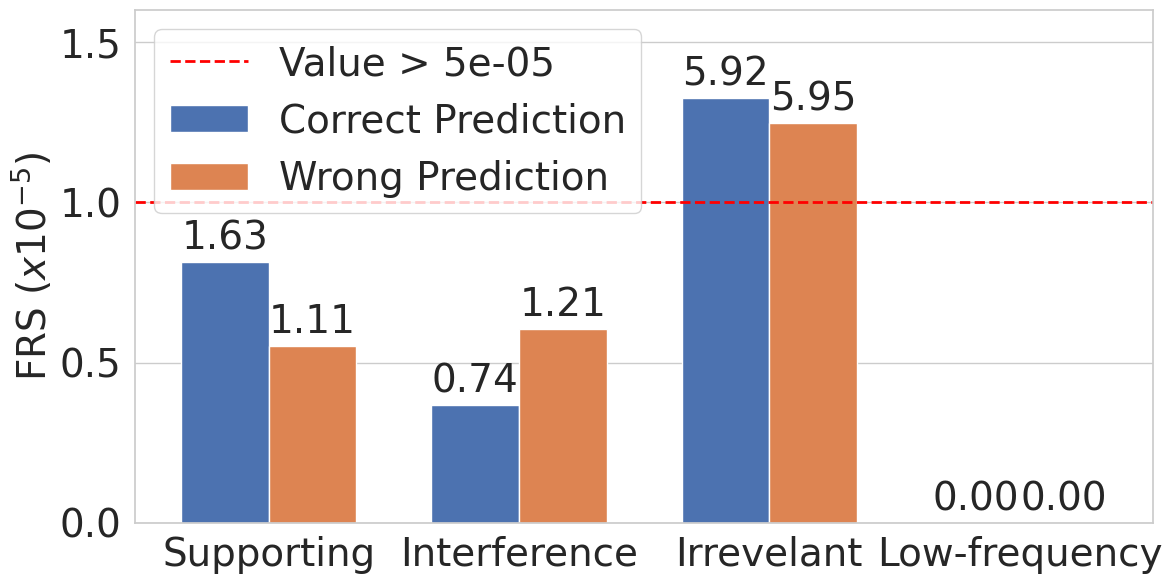

In [37]:
from matplotlib.ticker import ScalarFormatter

def statistic_attention_score(score_dict):
    """
    There are three types of attention scores:
    1. clue_pos
    2. attack_pos
    3. irrelevant_pos
    """
    succ_head_counter = score_dict['succ_head_counter']
    fail_head_counter = score_dict['fail_head_counter']

    success_clue_score = np.mean([x['clue_pos'] for x in succ_head_counter.values()])
    fail_clue_score = np.mean([x['clue_pos'] for x in fail_head_counter.values()])
    success_attack_score = np.mean([x['attack_pos'] for x in succ_head_counter.values()])
    
    success_emoji_score = np.mean([x['emoji_pos'] if 'emoji_pos' in x else 0. for x in succ_head_counter.values()])
    fail_attack_score = np.mean([x['attack_pos']  for x in fail_head_counter.values()])
    success_irrelevant_score = np.mean([x['irrelevant_pos'] for x in succ_head_counter.values()])
    fail_irrelevant_score = np.mean([x['irrelevant_pos'] for x in fail_head_counter.values()])
    fail_emoji_score = np.mean([x['emoji_pos'] if 'emoji_pos' in x else 0. for x in fail_head_counter.values()])

    return [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score, fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score]


def draw(data, file_path=None):
    sns.set_theme(style="whitegrid")
    success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score, fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score = data
    
    
    # success_irrelevant_score = 95.34/1e5
    # fail_irrelevant_score = 95.40/1e5
    labels = ['Supporting', 'Interference', 'Irrevelant', 'Low-frequency']

    y_upper_limit = 2e-5  # the upper limit of y-axis

    x = np.arange(len(labels))
    width = 0.35  # 柱状图的宽度


    # # 绘图
    # fig, ax = plt.subplots(figsize=(12, 6))

    # # 绘制柱状图
    # rects1 = ax.bar(
    #     x - width/2,
    #     list(map(lambda x: x if x < rect1_y_upper_limit else rect1_y_upper_limit,
    #             [success_clue_score, success_attack_score, success_irrelevant_score])),
    #     width, label='Correct Prediction'
    # )
    # rects2 = ax.bar(
    #     x + width/2,
    #     list(map(lambda x: x if x < rect2_y_upper_limit else rect2_y_upper_limit,
    #             [fail_clue_score, fail_attack_score, fail_irrelevant_score])),
    #     width, label='Wrong Prediction'
    # )

    # # 设置 y 轴范围并绘制红色虚线
    # ax.set_ylim(0, 2.8e-5)  # 总体 y 范围
    # ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value larger than {y_upper_limit}')

    # # 添加顶部注释
    # ax.annotate(
    #     r'$x10^{-5}$', 
    #     xy=(0.5, 1.02),  # 顶部中间，超出绘图区
    #     xycoords='axes fraction', 
    #     fontsize=16,
    #     ha='center', 
    #     va='center'
    # )

    # # 添加坐标标签和格式调整
    # ax.set_ylabel('FRS', fontsize=24)
    # ax.set_xticks(x)
    # ax.set_xticklabels(labels, fontsize=24)
    # ax.tick_params(axis='x', labelsize=24)
    # ax.tick_params(axis='y', labelsize=24)
    # ax.set_yticklabels(["0.0", "0.5", "1.0", "1.5", "2.0", "100"], fontsize=18)
    # ax.xaxis.grid(False)
    # ax.legend(fontsize=15)

    # # 增加顶部留白
    # plt.subplots_adjust(top=0.85)  # 顶部增加留白，默认 top=0.9，调小一点即可


    # 绘制柱状图
    fig, ax = plt.subplots(figsize=(12, 6))
    # rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score])), width, label='Correct Prediction')
    # rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < y_upper_limit else y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score])), width, label='Wrong Prediction')

    ax.set_ylim(0, 2.5e-5)  # set ylim
    ax.xaxis.grid(False)

    # if max(data) > y_upper_limit:
    #     ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value larger than {y_upper_limit}')

    y_upper_limit = 2e-5  # the upper limit of y-axis

    rect1_y_upper_limit = 2e-5 +5e-6+ 0.15*1e-5 

    rect2_y_upper_limit = 2e-5 + 5e-6 - 5e-8

    x = np.arange(len(labels))
    width = 0.35  # 柱状图的宽度

    rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < rect1_y_upper_limit else rect1_y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score])), width, label='Correct Prediction')
    rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < rect2_y_upper_limit else rect2_y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score])), width, label='Wrong Prediction')

    fontsize = 28
    ax.set_ylim(0, 3.2e-5)  # set ylim
    ax.xaxis.grid(False)
    print("yu:",y_upper_limit)
    ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value > {5e-5}')
    # 添加一些文本标签、标题和自定义x轴标签
    # ax.set_ylabel('FRS', fontsize=24)  # 设置纵坐标标签字体大小并加粗
    ax.set_ylabel(r'FRS ($x10^{-5}$)', fontsize = fontsize)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=fontsize)  # 设置横坐标标签字体大小并加粗
    ax.set_yticklabels(["0.0","0.5","1.0","1.5","5.0", "6.0"])

    ax.legend(fontsize=fontsize)  # 设置 legend 字体加粗并横向排列
    ax.tick_params(axis='x', labelsize=fontsize)  # 设置横坐标字体大小
    ax.tick_params(axis='y', labelsize= fontsize)  # 设置纵坐标字体大小
    # 在柱状图上显示数值

    # 添加额外的文字(zecheng note: 在 4-hop-0 的设置下才绘制这个)
    # fail_irrelevant_index = labels.index('Irrevelant')  # 确定位置索引
    # fail_irrelevant_x = x[fail_irrelevant_index] + width / 2  # 确定 X 坐标
    # fail_irrelevant_y = fail_irrelevant_score  # 确定 Y 坐标
    # ax.annotate(
    #     "Spaces, punctuations,\nescape character, etc",
    #     xy=(fail_irrelevant_x, fail_irrelevant_y + 0.2e-5),
    #     xytext=(0, 10),  # 设置偏移量
    #     textcoords="offset points",
    #     fontsize=fontsize - 4,
    #     ha='center',
    #     va='bottom',
    #     color='red'
    # )

    def autolabel(rects, score_list):
        for rect, score in zip(rects, score_list):
            ax.annotate(f'{round(score / 1e-5, 2):.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=fontsize)
    autolabel(rects1, [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score])
    autolabel(rects2, [fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score])
    fig.tight_layout()
    # plt.show()
    if file_path:
        plt.savefig(file_path)


for file in hop_files[:1]:
    save_file_name = os.path.join("/data/zecheng/acl2025/MyRLHF/paper_figure/preliminary/fact_retrieval_score", f"{os.path.basename(file).split('.')[0]}.pdf")
    print(save_file_name)
    res = statistic_attention_score(auto_read_data(file))
    if os.path.basename(file).split('.')[0].split('-')[-1] == '0':
        res[2] = 0; res[-1] = 0   # for short context testing, it has no relevant long-context
    draw(res, save_file_name)

In [85]:
save_file_name

'/data/zecheng/acl2025/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-11900.pdf'

#### 短文本上的multihop reasoning

/data/zecheng/acl2025/MyRLHF/paper_figure/preliminary/fact_retrieval_score/4-hop-0.pdf
begin to read data from /data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/attention_analysis/attention_score_wo_emoji/4-hop-0.json | file size: 151.31 KB | file type: json
yu: 2e-05
1.6790696944313486e-05
4.047634957850665e-06
0
0.0
1.5081503452398838e-05
2.3536193065154248e-06
1.0000000000000002e-06
0


/tmp/ipykernel_35403/2547043886.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0.0","0.5","1.0","1.5","5.0", "6.0"])


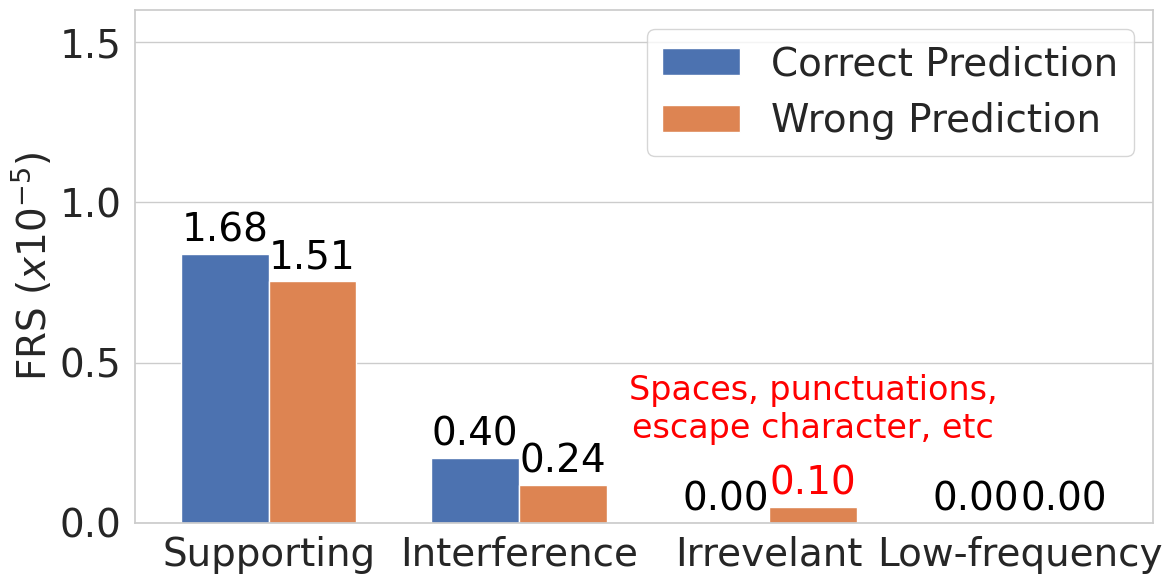

In [33]:
from matplotlib.ticker import ScalarFormatter

def statistic_attention_score(score_dict):
    """
    There are three types of attention scores:
    1. clue_pos
    2. attack_pos
    3. irrelevant_pos
    """
    succ_head_counter = score_dict['succ_head_counter']
    fail_head_counter = score_dict['fail_head_counter']

    success_clue_score = np.mean([x['clue_pos'] for x in succ_head_counter.values()])
    fail_clue_score = np.mean([x['clue_pos'] for x in fail_head_counter.values()])
    success_attack_score = np.mean([x['attack_pos'] for x in succ_head_counter.values()])
    
    success_emoji_score = np.mean([x['emoji_pos'] if 'emoji_pos' in x else 0. for x in succ_head_counter.values()])
    fail_attack_score = np.mean([x['attack_pos']  for x in fail_head_counter.values()])
    success_irrelevant_score = np.mean([x['irrelevant_pos'] for x in succ_head_counter.values()])
    fail_irrelevant_score = np.mean([x['irrelevant_pos'] if 'emoji_pos' in x else 0.1e-5 for x in fail_head_counter.values()])
    fail_emoji_score = np.mean([x['emoji_pos'] if 'emoji_pos' in x else 0. for x in fail_head_counter.values()])

    return [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score, fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score]


def draw(data, file_path=None):
    sns.set_theme(style="whitegrid")
    success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score, fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score = data
    
    
    # success_irrelevant_score = 95.34/1e5
    # fail_irrelevant_score = 95.40/1e5
    labels = ['Supporting', 'Interference', 'Irrevelant', 'Low-frequency']

    y_upper_limit = 2e-5  # the upper limit of y-axis

    x = np.arange(len(labels))
    width = 0.35  # 柱状图的宽度

    # 绘制柱状图
    fig, ax = plt.subplots(figsize=(12, 6))

    ax.set_ylim(0, 2.5e-5)  # set ylim
    ax.xaxis.grid(False)

    y_upper_limit = 2e-5  # the upper limit of y-axis

    rect1_y_upper_limit = 2e-5 +5e-6+ 0.15*1e-5 

    rect2_y_upper_limit = 2e-5 + 5e-6 - 5e-8

    x = np.arange(len(labels))
    width = 0.35  # 柱状图的宽度

    rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < rect1_y_upper_limit else rect1_y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score])), width, label='Correct Prediction')
    rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < rect2_y_upper_limit else rect2_y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score])), width, label='Wrong Prediction')

    fontsize = 28
    ax.set_ylim(0, 3.2e-5)  # set ylim
    ax.xaxis.grid(False)
    print("yu:",y_upper_limit)
    # ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value > {5e-5}')
    # 添加一些文本标签、标题和自定义x轴标签
    # ax.set_ylabel('FRS', fontsize=24)  # 设置纵坐标标签字体大小并加粗
    ax.set_ylabel(r'FRS ($x10^{-5}$)', fontsize = fontsize)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=fontsize)  # 设置横坐标标签字体大小并加粗
    ax.set_yticklabels(["0.0","0.5","1.0","1.5","5.0", "6.0"])

    ax.legend(fontsize=fontsize)  # 设置 legend 字体加粗并横向排列
    ax.tick_params(axis='x', labelsize=fontsize)  # 设置横坐标字体大小
    ax.tick_params(axis='y', labelsize= fontsize)  # 设置纵坐标字体大小
    # 在柱状图上显示数值

    # 添加额外的文字(zecheng note: 在 4-hop-0 的设置下才绘制这个)
    fail_irrelevant_index = labels.index('Irrevelant')  # 确定位置索引
    fail_irrelevant_x = x[fail_irrelevant_index] + width / 2  # 确定 X 坐标
    fail_irrelevant_y = fail_irrelevant_score  # 确定 Y 坐标
    ax.annotate(
        "Spaces, punctuations,\nescape character, etc",
        xy=(fail_irrelevant_x, fail_irrelevant_y + 0.3e-5),
        xytext=(0, 10),  # 设置偏移量
        textcoords="offset points",
        fontsize=fontsize - 4,
        ha='center',
        va='bottom',
        color='red'
    )

    def autolabel(rects, score_list):
        for rect, score in zip(rects, score_list):
            print(score)
            if score >= 0.09e-5 and score < 0.15e-5:
                color = 'red'
            else:
                color = 'black'
            ax.annotate(f'{round(score / 1e-5, 2):.2f}',
                        xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=fontsize, color=color)
    autolabel(rects1, [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score])
    autolabel(rects2, [fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score])
    fig.tight_layout()
    # plt.show()
    if file_path:
        plt.savefig(file_path)


for file in hop_files[:1]:
    save_file_name = os.path.join("/data/zecheng/acl2025/MyRLHF/paper_figure/preliminary/fact_retrieval_score", f"{os.path.basename(file).split('.')[0]}.pdf")
    print(save_file_name)
    res = statistic_attention_score(auto_read_data(file))
    if os.path.basename(file).split('.')[0].split('-')[-1] == '0':
        res[2] = 0; res[-1] = 0   # for short context testing, it has no relevant long-context
    draw(res, save_file_name)

#### 长文本上的multihop reasoning

yu: inf
1.48
0.87
6.16
1.17
1.3
5.99


/tmp/ipykernel_36875/306992639.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(["0.0","0.5","1.0","1.5","2.0","8.0"])


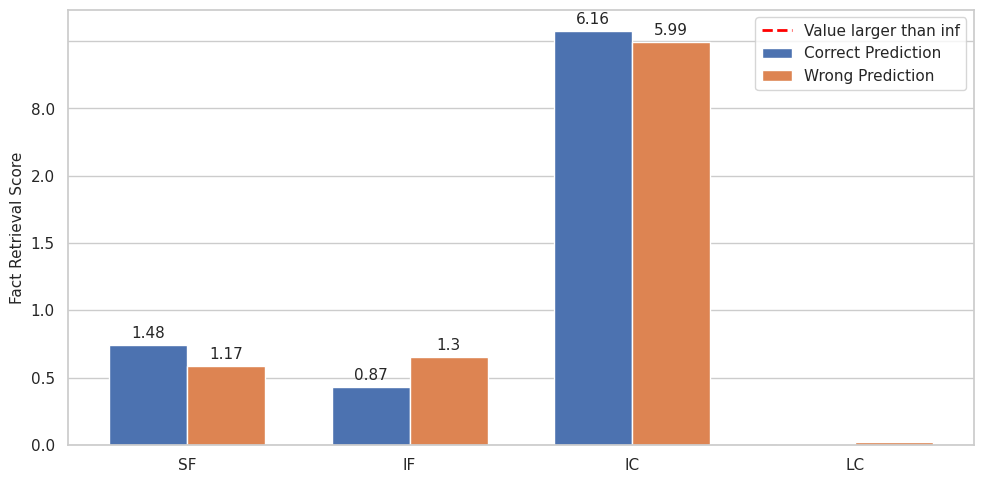

In [65]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.ticker import ScalarFormatter
sns.set_theme(style="whitegrid")

success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score, fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score = res
# success_irrelevant_score = 95.34/1e5
# fail_irrelevant_score = 95.40/1e5
labels = ['SF', 'IF', 'IC', 'LC']

# y_upper_limit = 2e-5  # the upper limit of y-axis

# rect1_y_upper_limit = 2e-5 +2e-6

# rect2_y_upper_limit = 2e-5 + 2e-6 + 2e-7

y_upper_limit = float("inf")  # the upper limit of y-axis

rect1_y_upper_limit = float("inf") 

rect2_y_upper_limit = float("inf") 

x = np.arange(len(labels))
width = 0.35  # 柱状图的宽度

# 绘制柱状图y
fig, ax = plt.subplots(figsize=(10, 5))

plt.gca().yaxis.set_major_formatter(ScalarFormatter(useMathText=True)) #科学计数法
rects1 = ax.bar(x - width/2, list(map(lambda x: x if x < rect1_y_upper_limit else rect1_y_upper_limit, [success_clue_score, success_attack_score, success_irrelevant_score, success_emoji_score])), width, label='Correct Prediction')
rects2 = ax.bar(x + width/2, list(map(lambda x: x if x < rect2_y_upper_limit else rect2_y_upper_limit, [fail_clue_score, fail_attack_score, fail_irrelevant_score, fail_emoji_score])), width, label='Wrong Prediction')

# ax.set_ylim(0, 2.8e-5)  # set ylim
ax.xaxis.grid(False)
print("yu:",y_upper_limit)
ax.axhline(y=y_upper_limit, color='red', linestyle='--', linewidth=2, label=f'Value larger than {y_upper_limit}')

# 添加一些文本标签、标题和自定义x轴标签
ax.set_ylabel(r'FRS($\times$)', fontsize=11)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.set_yticklabels(["0.0","0.5","1.0","1.5","2.0","8.0"])
ax.legend(fontsize=11)
ax.tick_params(axis='x', labelsize=11)  # 设置横坐标字体大小
ax.tick_params(axis='y', labelsize=11)  # 设置纵坐标字体大小
# 在柱状图上显示数值

def autolabel(rects, score_list):
    for rect, score in zip(rects, score_list):
        print(round(score / 1e-5, 2))
        ax.annotate('{}'.format(round(score / 1e-5, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, rect.get_height()),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=11)

autolabel(rects1, [success_clue_score, success_attack_score, success_irrelevant_score])
autolabel(rects2, [fail_clue_score, fail_attack_score, fail_irrelevant_score])

fig.tight_layout()

plt.show()

# 0
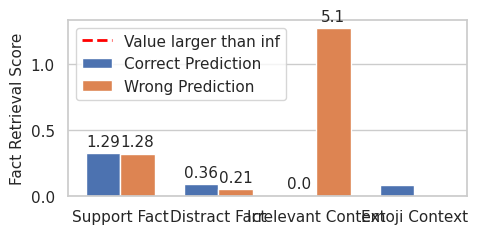

In [30]:
success_irrelevant_score,fail_irrelevant_score

(0, 5.0974988389289254e-05)

In [19]:
rects1[0].get_height()

8.929913952237085e-06

In [20]:
num_layers = 32
num_heads = 32
df_succ_scores = np.zeros((num_layers, num_heads))
df_fail_scores = np.zeros((num_layers, num_heads))

for key, values in succ_head_score.items():
    layer, head = map(int, key.split('-'))
    df_succ_scores[layer, head] = np.mean(values)

for key, values in fail_head_score.items():
    layer, head = map(int, key.split('-'))
    df_fail_scores[layer, head] = np.mean(values)

colors1 = ['#ffffff', '#90ee90', '#32cd32', '#006400']  # 浅绿 -> 中绿 -> 深绿
colors2 = ['#ffffff', '#ffa07a', '#ff6347', '#8b0000']  # 浅红 -> 中红 -> 深红
bounds = [0, 0.05, 0.3, 0.6, 1.0]  # 定义边界

# 创建colormap和norm
cmap1 = ListedColormap(colors1)
cmap2 = ListedColormap(colors2)
norm = BoundaryNorm(bounds, len(colors1))

# 转换为 DataFrame
df_succ_scores = pd.DataFrame(df_succ_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])
df_fail_scores = pd.DataFrame(df_fail_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])

sns.set_style("white")

fail_column_means = df_fail_scores.mean() # 计算每列的平均分
succ_column_means = df_succ_scores.mean()

# 使用apply函数，沿着列的方向（axis=0）应用一个函数
# 这个函数会检查每一个元素，如果元素值低于其所在列的平均分，那么该元素值将被设置为0
df_succ_scores = df_succ_scores.apply(lambda x: [value if value >= succ_column_means[x.name] else 0 for value in x], axis=0)
df_fail_scores = df_fail_scores.apply(lambda x: [value if value >= fail_column_means[x.name] else 0 for value in x], axis=0)

succ_heads = df_succ_scores 
fail_heads = df_fail_scores 

# 绘制热力图
plt.figure(figsize=(14, 10))

sns.heatmap(succ_heads, cmap=cmap1, norm=norm, alpha=1, cbar=True, 
            cbar_kws={'label': 'Success Heads'}, linewidths=0.5, linecolor='gray')

sns.heatmap(fail_heads, cmap=cmap2, norm=norm, alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Failure Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Average Scores by Layer and Head')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.show()

NameError: name 'succ_head_score' is not defined

In [5]:
succ_heads > succ_heads.mean()

,Head 0,Head 1,Head 2,Head 3,Head 4,Head 5,Head 6,Head 7,Head 8,Head 9,...,Head 22,Head 23,Head 24,Head 25,Head 26,Head 27,Head 28,Head 29,Head 30,Head 31
Layer 0,False,False,False,True,True,True,True,False,True,True,...,True,True,False,False,False,False,True,True,True,True
Layer 1,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Layer 2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
Layer 3,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,False,True,True,True
Layer 4,True,True,True,True,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,True,False
Layer 5,False,False,False,False,False,False,False,False,True,True,...,False,True,False,False,False,False,False,False,False,False
Layer 6,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Layer 7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Layer 8,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Layer 9,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


下面是分析Reasoning Head 和 Retrieval Head 之间的关系

In [ ]:
# head_reasoning_file = "/data/zecheng/acl2025/MyRLHF/RetrievalHead/reetrievalheaddetect/head_score/q3_inf_diff_pos/Meta-Llama-3.1-8B-Instruct.json"
# head_score_file = "/data/zecheng/acl2025/MyRLHF/RetrievalHead/reetrievalheaddetect/head_score/niah_retrieval/Meta-Llama-3.1-8B-Instruct.json"
head_reasoning_file = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/head_score/q3_inf_diff_pos/Qwen2.5-7B-Instruct.json"
head_score_file = "/data/zecheng/acl2025/MyRLHF/reetrievalheaddetect/head_score/niah_retrieval/Qwen2.5-7B-Instruct.json"
reason_scores = auto_read_data(head_reasoning_file)
retrieval_scores = auto_read_data(head_score_file)

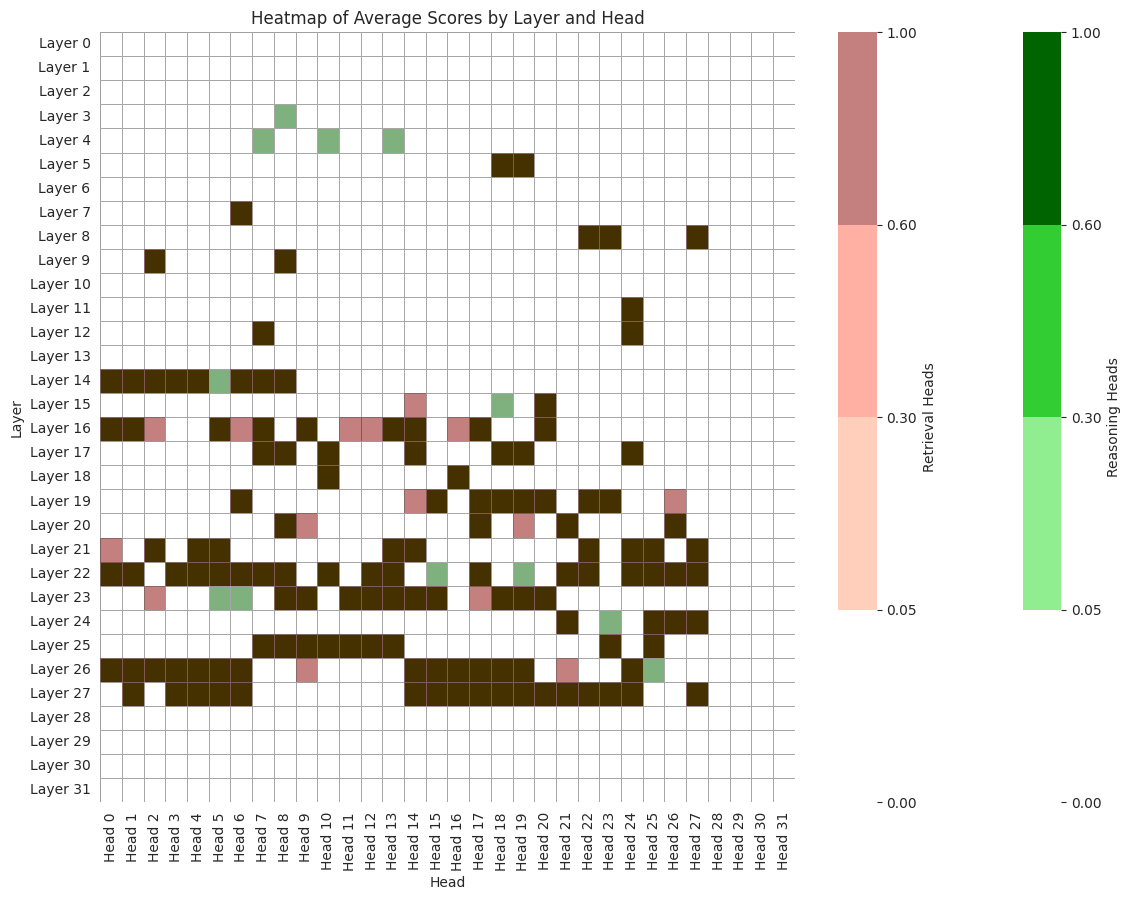

In [6]:
num_layers = 32
num_heads = 32
df_reason_scores = np.zeros((num_layers, num_heads))
df_retrieval_scores = np.zeros((num_layers, num_heads))

for key, values in reason_scores.items():
    layer, head = map(int, key.split('-'))
    df_reason_scores[layer, head] = np.mean(values)

for key, values in retrieval_scores.items():
    layer, head = map(int, key.split('-'))
    df_retrieval_scores[layer, head] = np.mean(values)

colors1 = ['#ffffff', '#90ee90', '#32cd32', '#006400']  # 浅绿 -> 中绿 -> 深绿
colors2 = ['#ffffff', '#ffa07a', '#ff6347', '#8b0000']  # 浅红 -> 中红 -> 深红
bounds = [0, 0.05, 0.3, 0.6, 1.0]  # 定义边界

# 创建colormap和norm
cmap1 = ListedColormap(colors1)
cmap2 = ListedColormap(colors2)
norm = BoundaryNorm(bounds, len(colors1))

# 转换为 DataFrame
df_reason_scores = pd.DataFrame(df_reason_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])
df_retrieval_scores = pd.DataFrame(df_retrieval_scores, columns=[f'Head {i}' for i in range(num_heads)], 
                  index=[f'Layer {i}' for i in range(num_layers)])

sns.set_style("white")

reasoning_heads = df_reason_scores > 0.1
retrieval_heads = df_retrieval_scores > 0.1

# 绘制热力图
plt.figure(figsize=(14, 10))

sns.heatmap(reasoning_heads, cmap=cmap1, norm=norm, alpha=1, cbar=True, 
            cbar_kws={'label': 'Reasoning Heads'}, linewidths=0.5, linecolor='gray')

sns.heatmap(retrieval_heads, cmap=cmap2, norm=norm, alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Retrieval Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Heatmap of Average Scores by Layer and Head')
plt.xlabel('Head')
plt.ylabel('Layer')
plt.show()

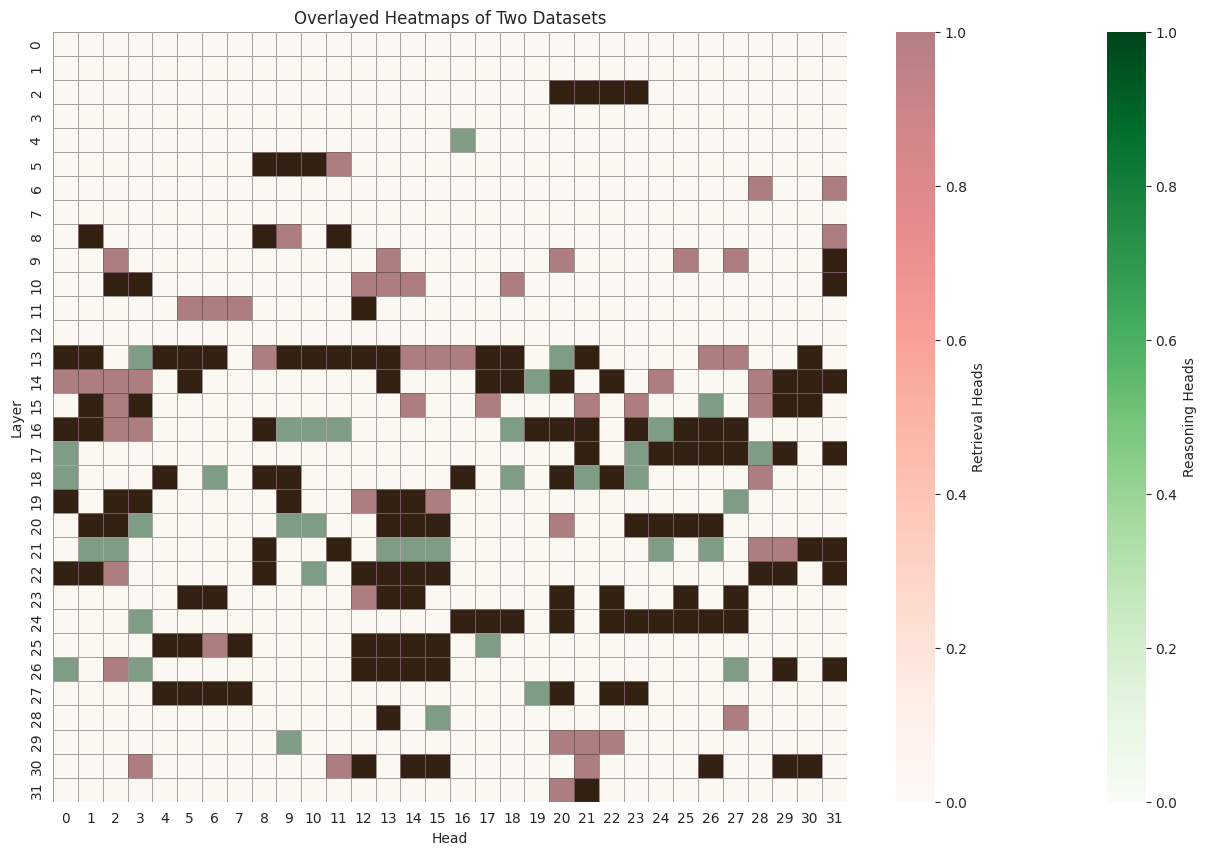

In [5]:
num_layers = 32
num_heads = 32
df_reason_scores = np.zeros((num_layers, num_heads))
df_retrieval_scores = np.zeros((num_layers, num_heads))

for key, values in reason_scores.items():
    layer, head = map(int, key.split('-'))
    df_reason_scores[layer, head] = np.mean(values)

for key, values in retrieval_scores.items():
    layer, head = map(int, key.split('-'))
    df_retrieval_scores[layer, head] = np.mean(values)

reasoning_heads = df_reason_scores > 0.1
retrieval_heads = df_retrieval_scores > 0.1

plt.figure(figsize=(16, 10))
sns.heatmap(reasoning_heads, cmap='Greens', alpha=1, cbar=True, 
            cbar_kws={'label': 'Reasoning Heads'}, linewidths=0.5, linecolor='gray')
sns.heatmap(retrieval_heads, cmap='Reds', alpha=0.5, cbar=True, 
            cbar_kws={'label': 'Retrieval Heads'}, linewidths=0.5, linecolor='gray')

plt.title('Overlayed Heatmaps of Two Datasets')
plt.xlabel('Head')
plt.ylabel('Layer')

plt.show()
